In [1]:
from pathlib import Path
import csv
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
path=Path('death_valley_2021_simple.csv')
lines=path.read_text().splitlines()
reader=csv.reader(lines)
header_now = next(reader)
# print(header_now)
for index,value in enumerate(header_now):
    print(index,value)


0 STATION
1 NAME
2 DATE
3 TMAX
4 TMIN
5 TOBS


In [3]:
dates,highs,lows = [],[],[]
for row in reader:
  current_date = datetime.strptime(row[2],'%Y-%m-%d')
  try: 
    high=int(row[3])
    low= int(row[4])
  except ValueError:
    print(f"value is missing for {current_date}")
  else:
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

value is missing for 2021-05-04 00:00:00


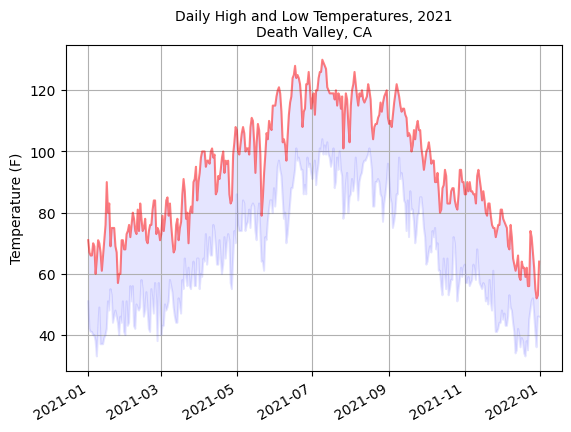

In [4]:
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red',alpha=0.5)
ax.plot(dates, lows, color='blue',alpha=0.1)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)
 # Format plot.
ax.set_title("Daily High and Low Temperatures, 2021\nDeath Valley, CA", fontsize=10)
ax.set_xlabel('', fontsize=10)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)
plt.grid()
plt.show()